In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import HuberRegressor

### Robustez

In [9]:
df = pd.read_csv('robustez.csv') 

In [10]:
df.head()

,Unnamed: 0,xx,yy
0,1,4,9.968515
1,2,5,11.007480
2,3,6,11.992446
3,4,7,12.975716
4,5,8,13.969277


In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df['xx'].values.reshape(-1, 1), df['yy'])

LinearRegression()

Primero tratamos con una regresión clásica

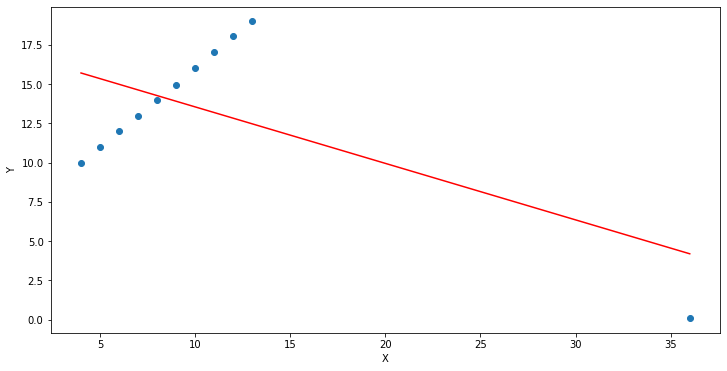

In [5]:
life_pred=model.predict(df['xx'].values.reshape(-1, 1))
fig= plt.figure(figsize=(12,6))
plt.scatter(df['xx'], df['yy'])
plt.plot(df['xx'],life_pred , color='red')
plt.xlabel('X')
plt.ylabel('Y');
plt.show()

Como podemos ver, la recta ajustada es muy mala, veamos ahora que sucede con una regresión robusta mediante la función de Huber para calcular la pérdida.


### REVISAR ESTO, HUBER FITEA MAL Y RARO PERO RANSAC BIEN, SACAMOS O MANTENEMOS?

In [97]:
from sklearn.linear_model import SGDRegressor
huber = SGDRegressor(loss='huber').fit(df['xx'].values.reshape(-1, 1), df['yy'])

In [86]:
from sklearn.linear_model import RANSACRegressor
huber = RANSACRegressor(residual_threshold=15).fit(df['xx'].values.reshape(-1, 1), df['yy'])

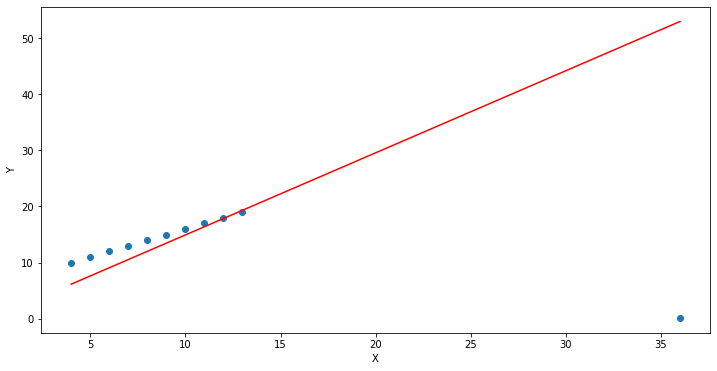

In [98]:
life_pred=huber.predict(df['xx'].values.reshape(-1, 1))
fig= plt.figure(figsize=(12,6))
plt.scatter(df['xx'], df['yy'])
plt.plot(df['xx'],life_pred , color='red')
plt.xlabel('X')
plt.ylabel('Y');
plt.show()

La recta esta mucho mejor ajustada, aunque todavía no es la ideal. Esto es debido a que la función de huber le resta importancia a los outliers pero no los elimina por completo

## Veamos ahora con un dataset con mas outliers

Para eso usaremos la libreria make_regression, la cual nos permite crear datos correlacionados positivamente

In [77]:
from sklearn.datasets import make_regression

In [84]:
rng = np.random.RandomState(0)
X, y = make_regression(n_samples=20, n_features=1, random_state=0, noise=4.0,bias=100.0)

Dibujamos los datos generados

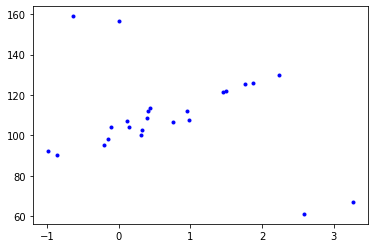

In [85]:

X_outliers = rng.normal(0, 0.5, size=(4, 1))
y_outliers = rng.normal(0, 2.0, size=4)
X_outliers[:2, :] += X.max() + X.mean() / 4.
X_outliers[2:, :] += X.min() - X.mean() / 4.
y_outliers[:2] += y.min() - y.mean() / 4.
y_outliers[2:] += y.max() + y.mean() / 4.
X = np.vstack((X, X_outliers))
y = np.concatenate((y, y_outliers))
plt.plot(X, y, 'b.')
plt.show()

Comenzamos por ajustar una regresión simple mediante la función de pérdida cuadrática (RSS)

In [88]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

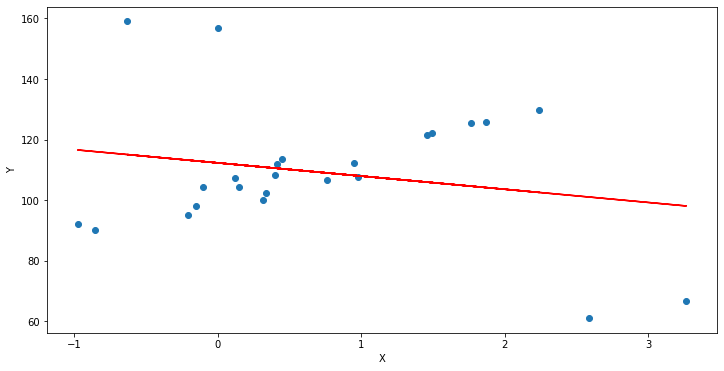

In [90]:
life_pred=model.predict(X)
fig= plt.figure(figsize=(12,6))
plt.scatter(X, y)
plt.plot(X,life_pred , color='red')
plt.xlabel('X')
plt.ylabel('Y');
plt.show()

Veamos ahora como ajusta cambiando la función de pérdida por la función de huber y estableciendo un epsilon (K) de 1 (el mínimo valor posible)

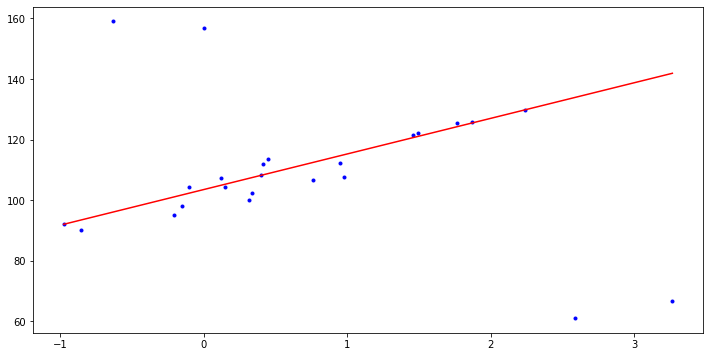

In [96]:

fig= plt.figure(figsize=(12,6))
colors = ['r-', 'b-', 'y-', 'm-']
plt.plot(X, y, 'b.')

x = np.linspace(X.min(), X.max(), 7)
epsilon_values = [1]
for k, epsilon in enumerate(epsilon_values):
    huber = HuberRegressor(fit_intercept=True, alpha=0.0, max_iter=100,
                           epsilon=epsilon)
    huber.fit(X, y)
    coef_ = huber.coef_ * x + huber.intercept_
    plt.plot(x, coef_, colors[k], label="huber loss, %s" % epsilon)
plt.show()

Podemos observar que la recta ajustada es mucho mejor ya que le da poca importancia a los outliers

Veamos ahora que sucede si variamos los valores de epsilon

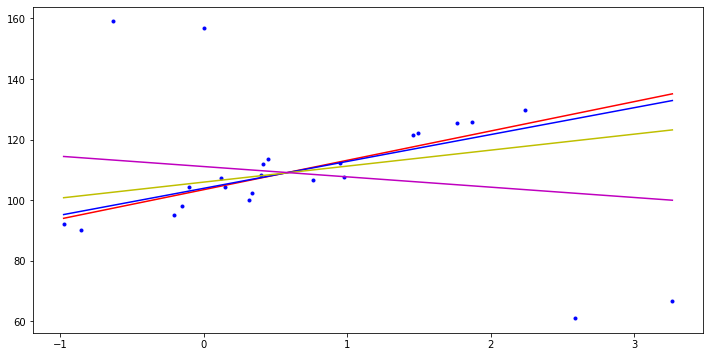

In [94]:

fig= plt.figure(figsize=(12,6))
colors = ['r-', 'b-', 'y-', 'm-']
plt.plot(X, y, 'b.')

x = np.linspace(X.min(), X.max(), 7)
epsilon_values = [1.35, 1.5, 1.75, 1.9]
for k, epsilon in enumerate(epsilon_values):
    huber = HuberRegressor(fit_intercept=True, alpha=0.0, max_iter=100,
                           epsilon=epsilon)
    huber.fit(X, y)
    coef_ = huber.coef_ * x + huber.intercept_
    plt.plot(x, coef_, colors[k], label="huber loss, %s" % epsilon)
plt.show()

Podemos ver que a medida que epsilon crece el ajuste se vuelva subóptimo dado que los pesos de outliers empiezana  influenciar mas fuertemente al cáculo de los coeficientes